<a href="https://colab.research.google.com/github/arshdeep6822/DeepLearning_projects/blob/main/Cats_vs_Dog_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Data Directory

In [1]:
!mkdir -p ./kaggle # This creates a directory named kaggle in the current working directory
!cp kaggle.json ~/.kaggle/ #

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


NOW WE HAVE A ZIP OF DOGS AND CATS LETS UNZIP IT

In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# Installing Required Libraries

In [4]:
! pip install tensorflow numpy matplotlib keras

# Importing Packages


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import tensorflow as tf
from tensorflow.keras import layers, models


from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Reading The Data

In [6]:
os.listdir("/content/dogs_vs_cats/test/cats")

# os.listdir("path") makes a list of all the contents in the directory that we provided the path to

['cat.2584.jpg',
 'cat.4877.jpg',
 'cat.9058.jpg',
 'cat.8986.jpg',
 'cat.2806.jpg',
 'cat.10114.jpg',
 'cat.3111.jpg',
 'cat.1453.jpg',
 'cat.10733.jpg',
 'cat.7328.jpg',
 'cat.3164.jpg',
 'cat.5715.jpg',
 'cat.1088.jpg',
 'cat.2958.jpg',
 'cat.5655.jpg',
 'cat.5413.jpg',
 'cat.9855.jpg',
 'cat.9157.jpg',
 'cat.1628.jpg',
 'cat.12457.jpg',
 'cat.7361.jpg',
 'cat.5334.jpg',
 'cat.5694.jpg',
 'cat.10086.jpg',
 'cat.7866.jpg',
 'cat.1181.jpg',
 'cat.4352.jpg',
 'cat.1690.jpg',
 'cat.430.jpg',
 'cat.6297.jpg',
 'cat.6944.jpg',
 'cat.12044.jpg',
 'cat.10915.jpg',
 'cat.4972.jpg',
 'cat.5430.jpg',
 'cat.8415.jpg',
 'cat.4319.jpg',
 'cat.3669.jpg',
 'cat.12491.jpg',
 'cat.10710.jpg',
 'cat.8259.jpg',
 'cat.2408.jpg',
 'cat.5670.jpg',
 'cat.10660.jpg',
 'cat.3059.jpg',
 'cat.11035.jpg',
 'cat.7331.jpg',
 'cat.1051.jpg',
 'cat.11165.jpg',
 'cat.1531.jpg',
 'cat.11355.jpg',
 'cat.6465.jpg',
 'cat.3879.jpg',
 'cat.11343.jpg',
 'cat.833.jpg',
 'cat.4559.jpg',
 'cat.8530.jpg',
 'cat.7872.jpg',
 'c

In [7]:
random.sample(os.listdir("/content/dogs_vs_cats/test/cats"), 9)

# randomly samples 9 images from directory

['cat.12450.jpg',
 'cat.11688.jpg',
 'cat.763.jpg',
 'cat.5649.jpg',
 'cat.10110.jpg',
 'cat.4384.jpg',
 'cat.1956.jpg',
 'cat.10338.jpg',
 'cat.4612.jpg']

** we can see we have only gotten a stringname for the image , for the whole path we will have to = directory path + image name**

In [8]:
def plot_images_from_directory(directory_path, class_animal, num_images):

  image_filenames = os.listdir(directory_path)

  if len(image_filenames)<num_images:
    print(f"only found {len(image_filenames)} images in {directory_path}, dispalying them all:")
    num_images = len(image_filenames)

  selected_images = random.sample(image_filenames, num_images)

  fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
  axes = axes.ravel()

  for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    # Image.open('example.jpg') opens the example.jpg file and returns it as an image object
    axes[i].imshow(image)
    axes[i].set_title(f"image: {class_animal}")
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()

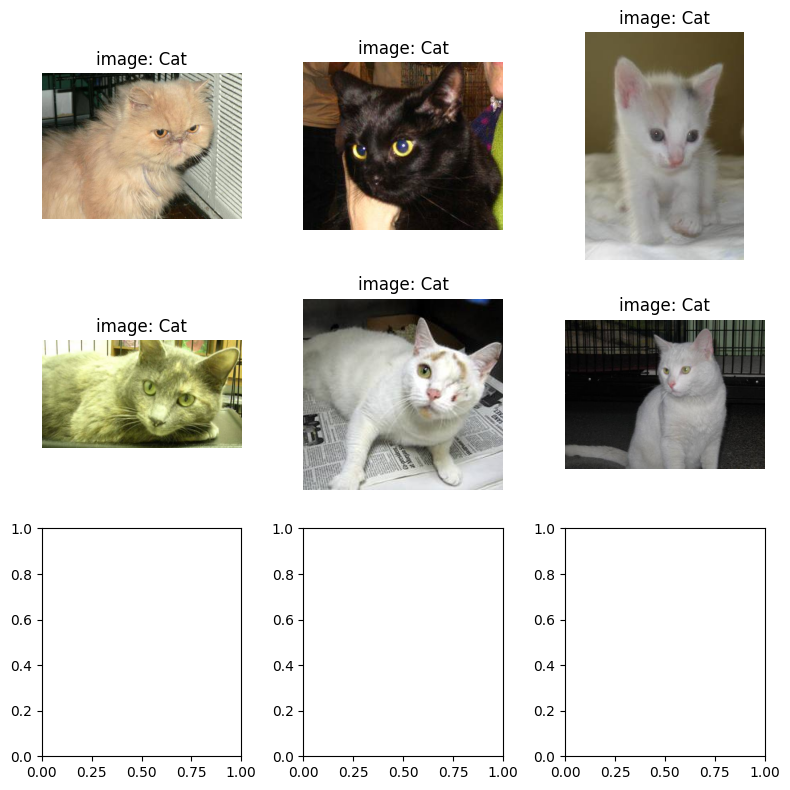

In [9]:
plot_images_from_directory("/content/dogs_vs_cats/test/cats", class_animal='Cat', num_images=6)

# REMOVING CORRUPTED IMAGES IF ANY

In [10]:
for x,y,z in os.walk("/content/dogs_vs_cats"):
  print(x,y,z)
#os.walk traverses each directory and prints
# dir_name, sub_directories, file_in_that_directory

/content/dogs_vs_cats ['test', 'train'] []
/content/dogs_vs_cats/test ['cats', 'dogs'] []
/content/dogs_vs_cats/test/cats [] ['cat.2584.jpg', 'cat.4877.jpg', 'cat.9058.jpg', 'cat.8986.jpg', 'cat.2806.jpg', 'cat.10114.jpg', 'cat.3111.jpg', 'cat.1453.jpg', 'cat.10733.jpg', 'cat.7328.jpg', 'cat.3164.jpg', 'cat.5715.jpg', 'cat.1088.jpg', 'cat.2958.jpg', 'cat.5655.jpg', 'cat.5413.jpg', 'cat.9855.jpg', 'cat.9157.jpg', 'cat.1628.jpg', 'cat.12457.jpg', 'cat.7361.jpg', 'cat.5334.jpg', 'cat.5694.jpg', 'cat.10086.jpg', 'cat.7866.jpg', 'cat.1181.jpg', 'cat.4352.jpg', 'cat.1690.jpg', 'cat.430.jpg', 'cat.6297.jpg', 'cat.6944.jpg', 'cat.12044.jpg', 'cat.10915.jpg', 'cat.4972.jpg', 'cat.5430.jpg', 'cat.8415.jpg', 'cat.4319.jpg', 'cat.3669.jpg', 'cat.12491.jpg', 'cat.10710.jpg', 'cat.8259.jpg', 'cat.2408.jpg', 'cat.5670.jpg', 'cat.10660.jpg', 'cat.3059.jpg', 'cat.11035.jpg', 'cat.7331.jpg', 'cat.1051.jpg', 'cat.11165.jpg', 'cat.1531.jpg', 'cat.11355.jpg', 'cat.6465.jpg', 'cat.3879.jpg', 'cat.11343.jpg'

In [11]:
import cv2
import imghdr

acceptable_imgs = ['jpg', 'png', 'jpeg']
data_dir = '/content/dogs_vs_cats'

for root, dirs, files in os.walk(data_dir):
  print(root, dirs, files)
  for fil in files:
    file_path = os.path.join(root,fil) # gives the name of file
    try:
      file_type = imghdr.what(file_path) # checks what type of file it is

      if file_type not in acceptable_imgs:
        print(f"Image {file_path} not acceptable")
        os.remove(file_path)
      else:
        img = cv2.imread(file_path) # returns the image as pixel array
    except Exception as e:

        print(f"Issue with {file_path}. Error {e}")
        os.remove(file_path)




/content/dogs_vs_cats ['test', 'train'] []
/content/dogs_vs_cats/test ['cats', 'dogs'] []
/content/dogs_vs_cats/test/cats [] ['cat.2584.jpg', 'cat.4877.jpg', 'cat.9058.jpg', 'cat.8986.jpg', 'cat.2806.jpg', 'cat.10114.jpg', 'cat.3111.jpg', 'cat.1453.jpg', 'cat.10733.jpg', 'cat.7328.jpg', 'cat.3164.jpg', 'cat.5715.jpg', 'cat.1088.jpg', 'cat.2958.jpg', 'cat.5655.jpg', 'cat.5413.jpg', 'cat.9855.jpg', 'cat.9157.jpg', 'cat.1628.jpg', 'cat.12457.jpg', 'cat.7361.jpg', 'cat.5334.jpg', 'cat.5694.jpg', 'cat.10086.jpg', 'cat.7866.jpg', 'cat.1181.jpg', 'cat.4352.jpg', 'cat.1690.jpg', 'cat.430.jpg', 'cat.6297.jpg', 'cat.6944.jpg', 'cat.12044.jpg', 'cat.10915.jpg', 'cat.4972.jpg', 'cat.5430.jpg', 'cat.8415.jpg', 'cat.4319.jpg', 'cat.3669.jpg', 'cat.12491.jpg', 'cat.10710.jpg', 'cat.8259.jpg', 'cat.2408.jpg', 'cat.5670.jpg', 'cat.10660.jpg', 'cat.3059.jpg', 'cat.11035.jpg', 'cat.7331.jpg', 'cat.1051.jpg', 'cat.11165.jpg', 'cat.1531.jpg', 'cat.11355.jpg', 'cat.6465.jpg', 'cat.3879.jpg', 'cat.11343.jpg'

In [12]:
# till now we have removed our unwanted images if any
cat_images = os.listdir("/content/dogs_vs_cats/test/cats")
dog_images = os.listdir("/content/dogs_vs_cats/test/dogs")
print(len(cat_images), len(dog_images))

2500 2500


# Load our images as arrays using Image.open(img)

In [13]:
from typing import IO
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array
  except IOError:
    print(f"could not read {image_path}")
    return None


array([[[ 63,  94,  16],
        [ 81, 112,  36],
        [ 81, 106,  40],
        ...,
        [242, 254, 168],
        [239, 248, 167],
        [254, 255, 193]],

       [[ 58,  86,   9],
        [ 72, 100,  25],
        [ 81, 106,  40],
        ...,
        [220, 232, 150],
        [219, 227, 150],
        [233, 234, 174]],

       [[ 66,  93,  16],
        [ 64,  90,  16],
        [ 77,  99,  34],
        ...,
        [212, 223, 147],
        [226, 233, 163],
        [233, 233, 179]],

       ...,

       [[254, 255, 240],
        [241, 242, 226],
        [253, 254, 238],
        ...,
        [ 80,  65,  70],
        [ 61,  46,  51],
        [ 56,  41,  46]],

       [[241, 242, 226],
        [230, 231, 215],
        [255, 255, 239],
        ...,
        [ 67,  52,  59],
        [ 63,  48,  55],
        [ 64,  49,  56]],

       [[230, 231, 215],
        [213, 214, 198],
        [232, 229, 212],
        ...,
        [ 55,  40,  47],
        [ 66,  51,  58],
        [ 69,  54,  61]]], dtype=uint8)
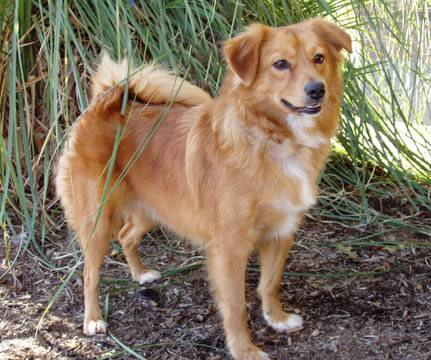

In [14]:
image_to_array("/content/dogs_vs_cats/train/dogs/dog.10003.jpg")

# Load our images as arrays using CV2

In [15]:
image = "/content/dogs_vs_cats/train/dogs/dog.10003.jpg"
img = cv2.imread(image)

if img is not None:
  print(img.shape)
  print(img)
else:
  print('imaghe could not be loaded')


(360, 431, 3)
[[[ 16  94  63]
  [ 36 112  81]
  [ 40 106  81]
  ...
  [168 254 242]
  [167 248 239]
  [193 255 254]]

 [[  9  86  58]
  [ 25 100  72]
  [ 40 106  81]
  ...
  [150 232 220]
  [150 227 219]
  [174 234 233]]

 [[ 16  93  66]
  [ 16  90  64]
  [ 34  99  77]
  ...
  [147 223 212]
  [163 233 226]
  [179 233 233]]

 ...

 [[240 255 254]
  [226 242 241]
  [238 254 253]
  ...
  [ 70  65  80]
  [ 51  46  61]
  [ 46  41  56]]

 [[226 242 241]
  [215 231 230]
  [239 255 255]
  ...
  [ 59  52  67]
  [ 55  48  63]
  [ 56  49  64]]

 [[215 231 230]
  [198 214 213]
  [212 229 232]
  ...
  [ 47  40  55]
  [ 58  51  66]
  [ 61  54  69]]]


# Building Model

Using TRAIN DATA WE WILL BUILD TRAIN AND VALIDATION DATA

keras provides with imageDataGenerator that we can use to distribute images in batches and split in train validation split


In [16]:
base_directory = "/content/dogs_vs_cats/train" # this is the directory we will use to train our data

In [17]:
datagenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# creating the data generator object

In [18]:
# setting train data
train_generator = datagenerator.flow_from_directory(
    base_directory,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary', # since we have binary outputs, we need binary labels
    subset = 'training')

# setting validation data
validation_generator = datagenerator.flow_from_directory(
    base_directory,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary', # since we have binary outputs, we need binary labels
    subset = 'validation')





Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


THIS STEP DISTRIBUTED ALL THE IMAGES IN THE TRAIN FOLDER INTO VALIDATION AND TRAIN


# Getting Class Labels

In [19]:
train_labels = train_generator.class_indices
validation_labels = validation_generator.class_indices

In [20]:
print(f"Training Class Labels : {train_labels}")
print(f"validation Class Labels : {validation_labels}")

Training Class Labels : {'cats': 0, 'dogs': 1}
validation Class Labels : {'cats': 0, 'dogs': 1}


In [21]:
images, labels = next(train_generator)
images, labels

# The next() function in Python is used to retrieve the next item from an iterator. If the iterator is exhausted (i.e., there are no more items to return), it raises a StopIteration

(array([[[[0.49411768, 0.53333336, 0.5019608 ],
          [0.49411768, 0.53333336, 0.5019608 ],
          [0.49411768, 0.5294118 , 0.50980395],
          ...,
          [0.73333335, 0.7725491 , 0.7686275 ],
          [0.73333335, 0.7725491 , 0.7686275 ],
          [0.73333335, 0.7725491 , 0.7686275 ]],
 
         [[0.5176471 , 0.5372549 , 0.5137255 ],
          [0.5176471 , 0.5372549 , 0.5137255 ],
          [0.5176471 , 0.5372549 , 0.52156866],
          ...,
          [0.6901961 , 0.7294118 , 0.7372549 ],
          [0.6901961 , 0.7294118 , 0.7372549 ],
          [0.6901961 , 0.7294118 , 0.7372549 ]],
 
         [[0.5372549 , 0.53333336, 0.5176471 ],
          [0.5372549 , 0.53333336, 0.5176471 ],
          [0.5372549 , 0.53333336, 0.5254902 ],
          ...,
          [0.70980394, 0.7411765 , 0.7843138 ],
          [0.70980394, 0.7411765 , 0.7843138 ],
          [0.70980394, 0.7411765 , 0.7843138 ]],
 
         ...,
 
         [[0.32156864, 0.2784314 , 0.27058825],
          [0.32941

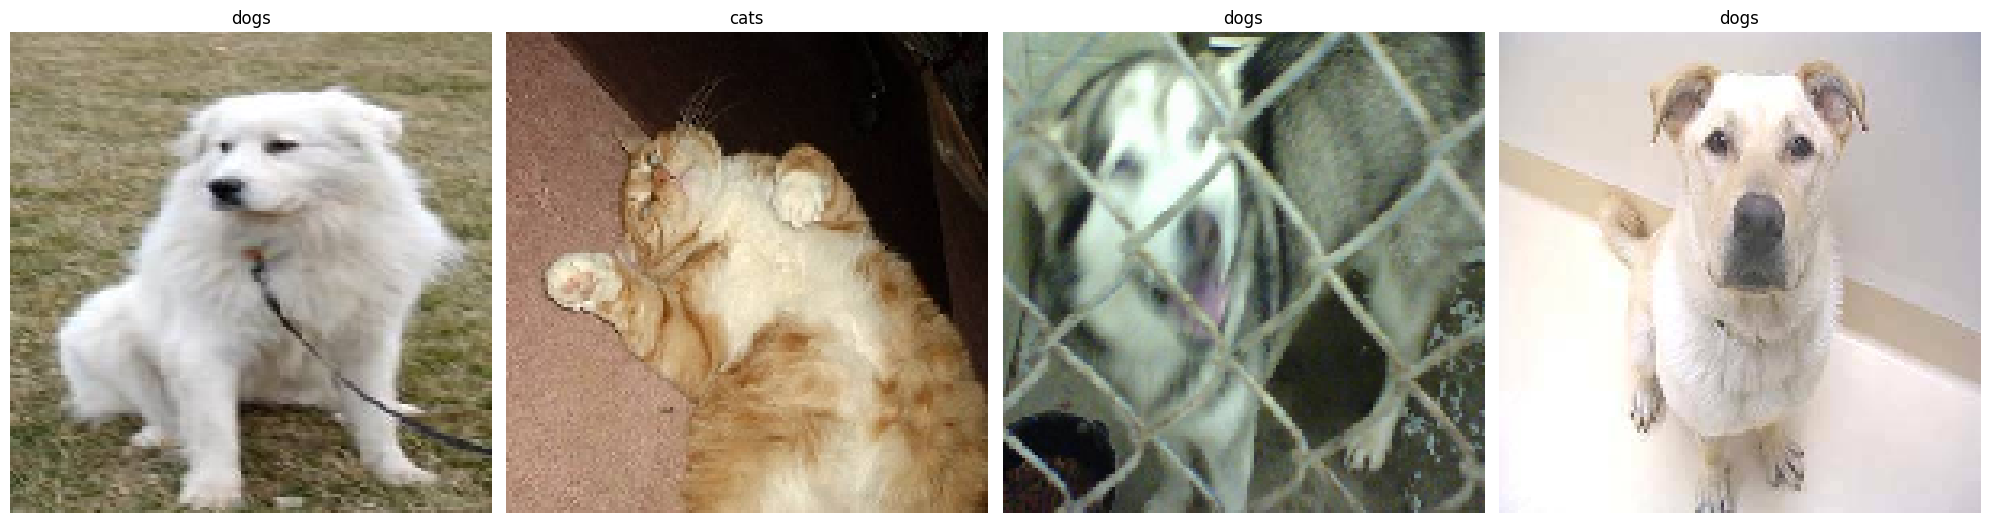

In [22]:
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator) # fetches the next batch of images. The generator yields images and labels in batches, typically as NumPy arrays

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

# if we keep on running this fn again and again we will get diff images since
# next() will go on to the next batch of 20 and get new 4 images from them

In [23]:
train_generator.reset() # to reset the iterator to first position

# BASIC CNN MODEL


In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# plot_model(model, to_file = 'Architecture.png',
    #       show_shapes=True, show_layer_names=True)

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [28]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/800 ━━━━━━━━━━━━━━━━━━━━ 8:46 2s/step - accuracy: 0.5826 - loss: 0.6615

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


800/800 ━━━━━━━━━━━━━━━━━━━━ 949s 1s/step - accuracy: 0.6060 - loss: 0.6449 - val_accuracy: 0.6708 - val_loss: 0.6209
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 951s 1s/step - accuracy: 0.7445 - loss: 0.5159 - val_accuracy: 0.7810 - val_loss: 0.4689
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.7982 - loss: 0.4311 - val_accuracy: 0.8180 - val_loss: 0.4105
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 986s 1s/step - accuracy: 0.8393 - loss: 0.3599 - val_accuracy: 0.8210 - val_loss: 0.3927
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 963s 1s/step - accuracy: 0.8682 - loss: 0.3038 - val_accuracy: 0.8357 - val_loss: 0.3710
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.8960 - loss: 0.2479 - val_accuracy: 0.8670 - val_loss: 0.3288
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 923s 1s/step - accuracy: 0.9200 - loss: 0.1957 - val_accuracy: 0.8875 - val_loss: 0.2804
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.9344 - loss: 0.1565 - val_accuracy: 0.884

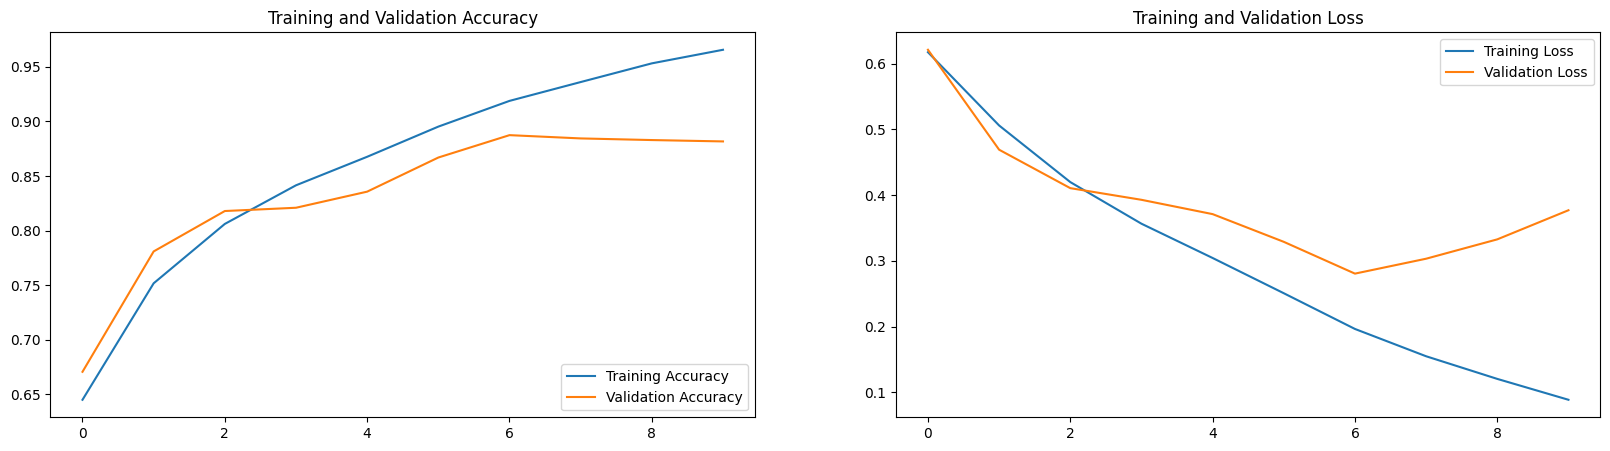

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Test Our Data

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [33]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step


array([[9.3653966e-07],
       [2.7838063e-05],
       [5.9992704e-05],
       ...,
       [9.9999326e-01],
       [4.6008620e-01],
       [9.9872112e-01]], dtype=float32)

In [34]:
print(len(probabilities))

5000


In [35]:
test_generator.reset()

In [36]:
true_classes = test_generator.classes
true_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Now we have got the true classes of each test data

In [37]:
# lets see what classes our prediction gave
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
# .astype(int) Converts the Boolean values (True, False) into integers (1 for True and 0 for False).
predicted_classes

array([0, 0, 0, ..., 1, 0, 1])

In [38]:
misclassified_indices = np.where(predicted_classes != true_classes)
misclassified_indices

(array([  42,   48,   50,   71,   76,   81,  113,  124,  130,  137,  161,
         179,  183,  222,  227,  234,  245,  250,  281,  289,  291,  306,
         322,  324,  328,  341,  358,  365,  367,  369,  378,  383,  393,
         397,  408,  431,  464,  478,  510,  519,  529,  542,  544,  562,
         575,  583,  602,  614,  634,  637,  667,  672,  683,  692,  693,
         696,  706,  712,  725,  733,  759,  776,  789,  792,  793,  794,
         798,  840,  842,  850,  855,  856,  860,  863,  876,  879,  888,
         902,  911,  923,  961,  964,  970,  971,  973,  976,  982, 1037,
        1038, 1056, 1065, 1080, 1082, 1091, 1093, 1113, 1116, 1123, 1130,
        1146, 1159, 1161, 1172, 1178, 1189, 1206, 1229, 1240, 1255, 1259,
        1268, 1277, 1282, 1300, 1318, 1319, 1325, 1352, 1384, 1397, 1399,
        1405, 1441, 1442, 1457, 1460, 1462, 1467, 1490, 1529, 1537, 1563,
        1567, 1591, 1592, 1609, 1625, 1633, 1645, 1647, 1659, 1665, 1681,
        1683, 1693, 1699, 1716, 1722, 

In [39]:
misclassified_indices = misclassified_indices[0]
misclassified_count = len(misclassified_indices)
misclassified_count

585

# Single Image Predictor

In [40]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150)) # from tensorflow.keras.preprocessing.image import load_img
    img_array = img_to_array(img)  # Converting to array. , from tensorflow.keras.preprocessing.image import img_to_array

    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: [[0.95080686]]


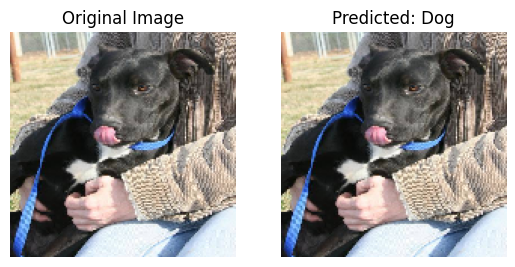

In [43]:
img_path = '/content/dogs_vs_cats/train/dogs/dog.10049.jpg'
make_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: [[1.1843376e-05]]


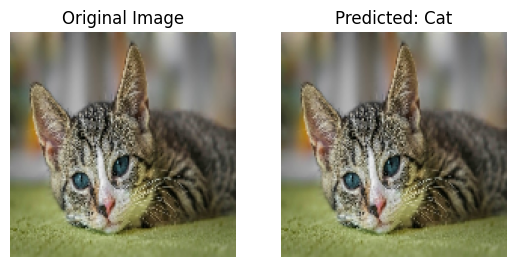

In [44]:
img_path = '/content/european-shorthair-8601492_640.jpg'
make_prediction(img_path)

# WE CAN ALSO SEE HOW OUR KERNELS ARE PROCESSING THE IMAGE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


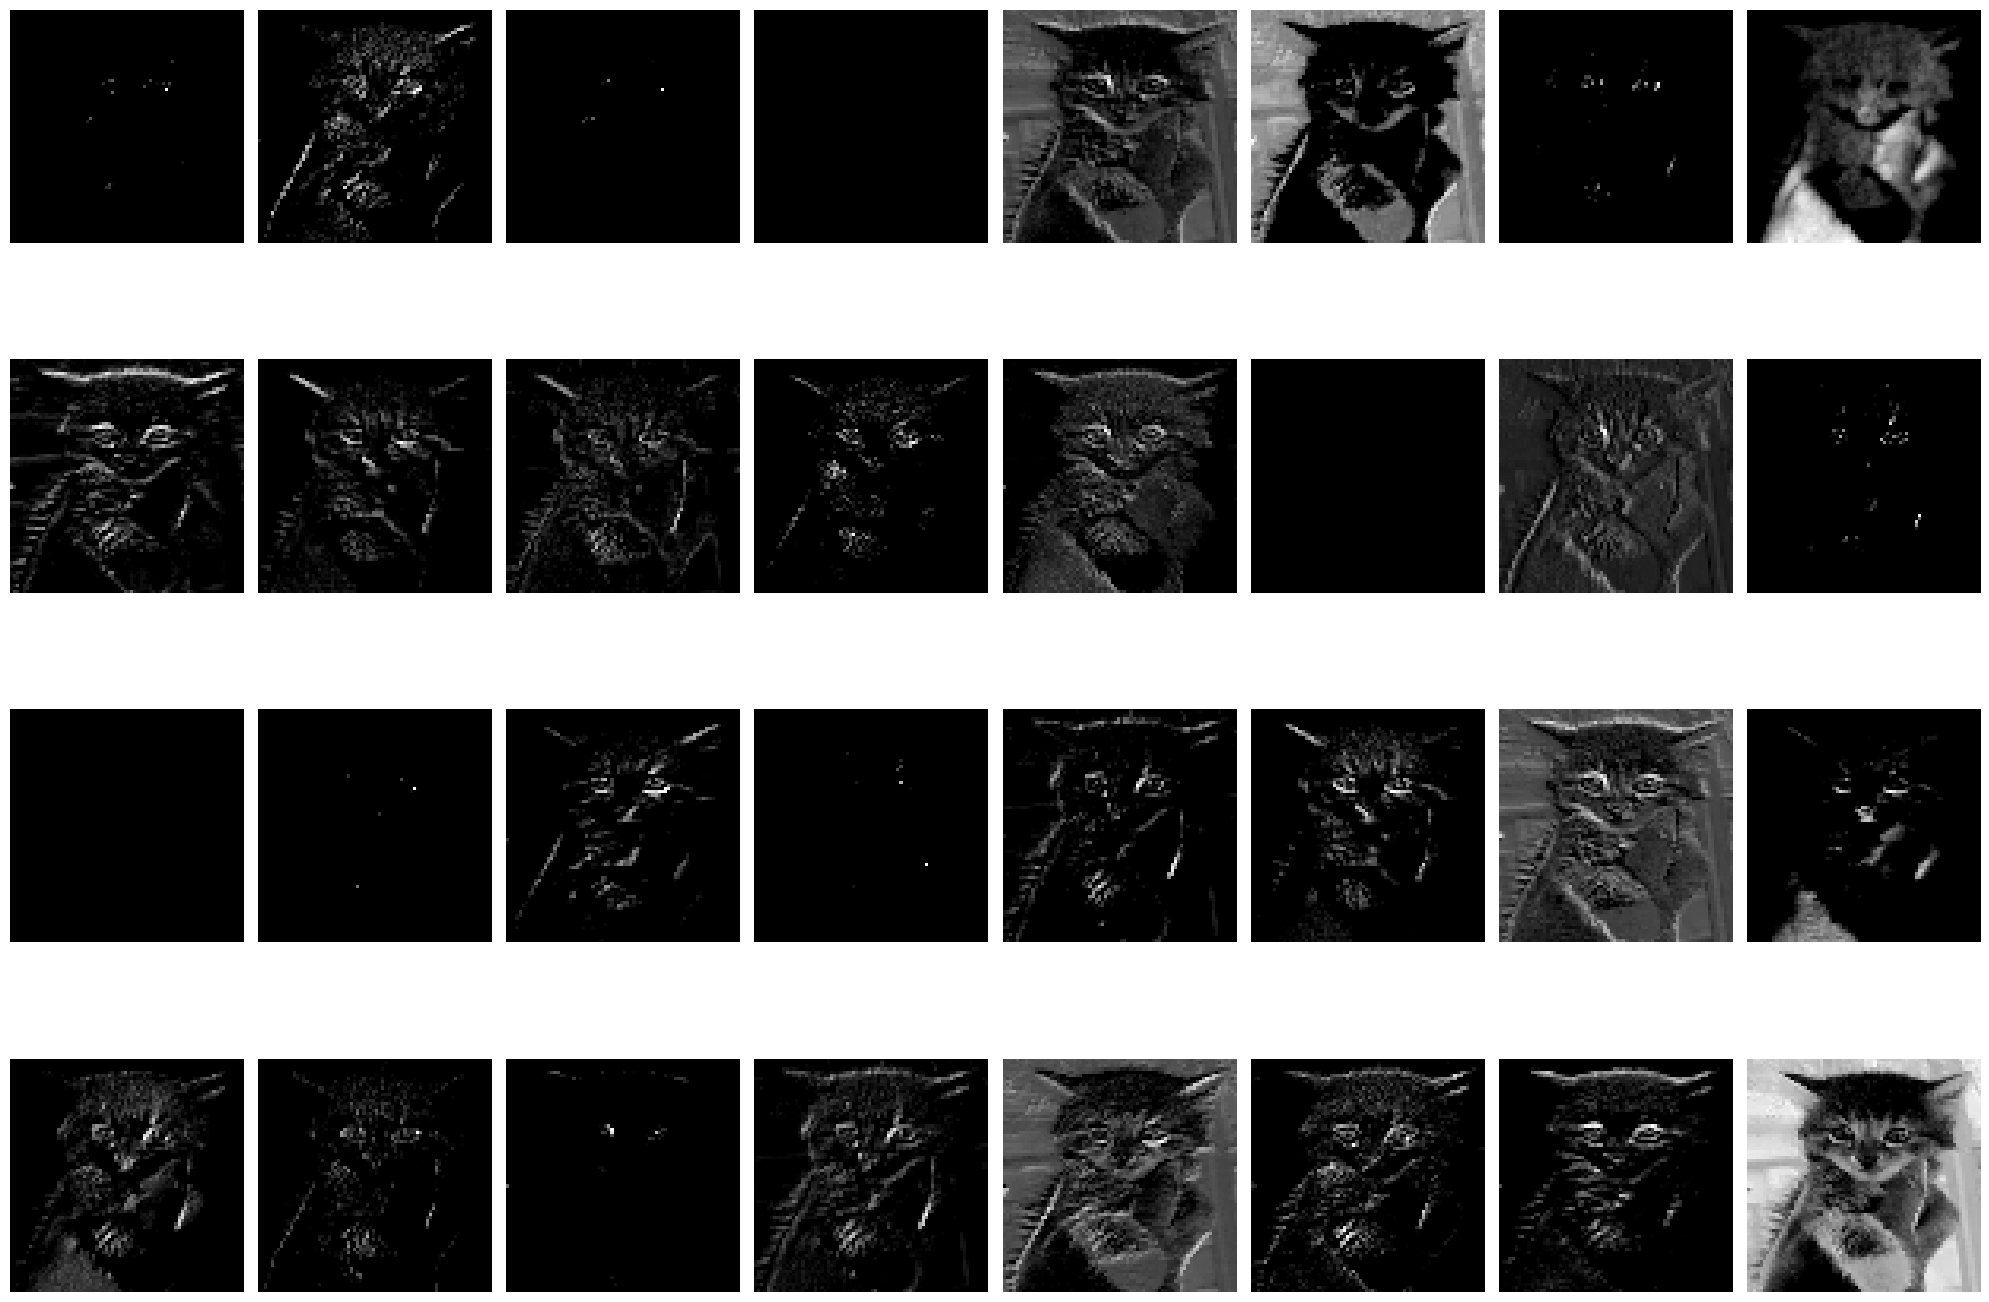

In [46]:
# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()